# Structure Data and ML Challenge
By Samuel Waweru

## Data Processing

In [1]:
# ImportingLibraries important for Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Prepping Approach
In the data preparation phase, I focused on loading the retail sales dataset and addressing missing values effectively. I identified critical columns for analysis and handled missing data by dropping rows with null values in essential columns and imputing others with appropriate strategies. Additionally, I performed feature engineering by extracting temporal features such as day, month, and day of the week from the date column to enhance the dataset's usability for analysis and modeling.

### Data Preping

In [2]:
#Loading Retail Sales Dataset and addressing the missing data appropriately
df_Retail_Sale = pd.read_csv('Resources/retail_sales_data.csv')

# Size of the dataset
print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
df_Retail_Sale.head()
  


Size of the dataset:  (18250, 13)
First 5 rows of the dataset:


,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate
0,2023-01-01,store_1,Electronics,Sunny,NaN,False,25-34,137.0,1409.76,430.08,979.68,10.29,0.0453
1,2023-01-01,store_1,Clothing,Rainy,Discount,False,55+,116.0,1612.79,1238.71,374.07,13.90,0.0407
2,2023-01-01,store_1,Groceries,Sunny,Seasonal,False,18-24,120.0,1307.37,168.46,1138.92,10.89,0.0793
3,2023-01-01,store_1,Home Goods,Sunny,Discount,False,55+,132.0,1756.65,220.98,1535.66,13.31,0.0442
4,2023-01-01,store_1,Beauty,Sunny,Seasonal,False,55+,120.0,1764.91,686.24,1078.67,14.71,0.0234


In [3]:
# Displaying the columns of the dataset
print("Columns of the dataset:")    
print(df_Retail_Sale.columns)
# Displaying the data types of the columns  
print("Data types of the columns:")
print(df_Retail_Sale.dtypes)
 


Columns of the dataset:
Index(['date', 'store_id', 'category', 'weather', 'promotion', 'special_event',
       'dominant_age_group', 'num_customers', 'total_sales', 'online_sales',
       'in_store_sales', 'avg_transaction', 'return_rate'],
      dtype='object')
Data types of the columns:
date                   object
store_id               object
category               object
weather                object
promotion              object
special_event          object
dominant_age_group     object
num_customers         float64
total_sales           float64
online_sales          float64
in_store_sales        float64
avg_transaction       float64
return_rate           float64
dtype: object


In [4]:
# Displaying the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
df_Retail_Sale.tail(5)

Last 5 rows of the dataset:


,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate
18245,2023-12-31,store_10,Electronics,Snowy,Seasonal,False,18-24,101.0,1545.95,969.54,576.41,15.31,0.0519
18246,2023-12-31,store_10,Clothing,Windy,Flash Sale,False,18-24,160.0,1721.38,1157.01,564.37,10.76,NaN
18247,2023-12-31,store_10,Groceries,Sunny,BOGO,False,45-54,187.0,2787.41,1007.79,1779.62,14.91,0.0191
18248,2023-12-31,store_10,Home Goods,Cloudy,BOGO,False,35-44,148.0,866.32,412.21,454.12,5.85,0.0382
18249,2023-12-31,store_10,Beauty,Windy,Discount,False,45-54,146.0,1711.93,847.53,864.40,11.73,0.0443


Number of missing values in each column:
date                     0
store_id                 0
category                 0
weather                346
promotion             3881
special_event          382
dominant_age_group     388
num_customers          398
total_sales            358
online_sales           354
in_store_sales         388
avg_transaction        374
return_rate            357
dtype: int64
date                   0.000000
store_id               0.000000
category               0.000000
weather                1.895890
promotion             21.265753
special_event          2.093151
dominant_age_group     2.126027
num_customers          2.180822
total_sales            1.961644
online_sales           1.939726
in_store_sales         2.126027
avg_transaction        2.049315
return_rate            1.956164
dtype: float64


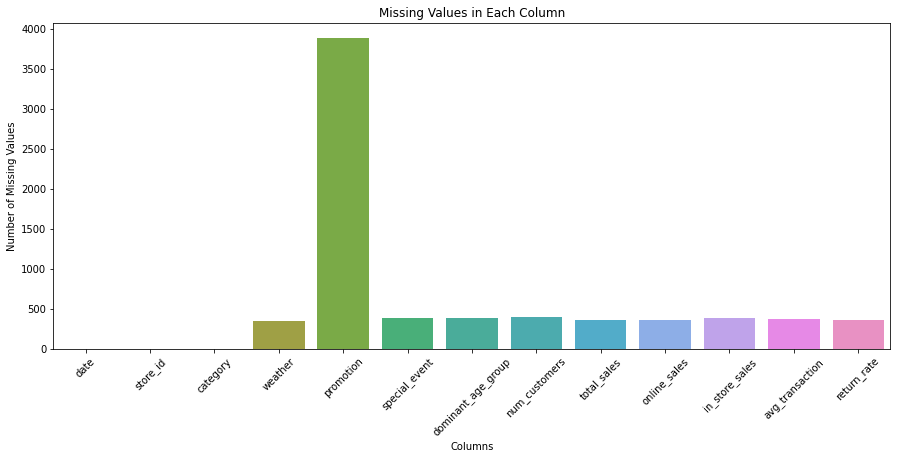

In [5]:
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())
print(df_Retail_Sale.isnull().sum() / df_Retail_Sale.shape[0] * 100)   
# Displaying the summary of missing values in each column in a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=df_Retail_Sale.isnull().sum().index, y=df_Retail_Sale.isnull().sum().values)
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()



From the above graph, Promotion field has the highest number of missing values. My approach would be to mathematically input data points into that field. All others with missing datapoints will be dropped. 


In [6]:
non_null_promotions = df_Retail_Sale['promotion'].dropna()
df_Retail_Sale.loc[df_Retail_Sale['promotion'].isnull(), 'promotion'] = np.random.choice(non_null_promotions, size=df_Retail_Sale['promotion'].isnull().sum())
# Size of the dataset

In [7]:
cols_to_consider = ['weather', 'special_event', 'dominant_age_group', 'num_customers', 
                    'total_sales', 'online_sales', 'in_store_sales', 'avg_transaction', 'return_rate']

df_Retail_Sale = df_Retail_Sale.dropna(subset=cols_to_consider)

# Size of the dataset
print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())

Size of the dataset:  (15141, 13)
Number of missing values in each column:
date                  0
store_id              0
category              0
weather               0
promotion             0
special_event         0
dominant_age_group    0
num_customers         0
total_sales           0
online_sales          0
in_store_sales        0
avg_transaction       0
return_rate           0
dtype: int64


In [8]:

print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())

Size of the dataset:  (15141, 13)
Number of missing values in each column:
date                  0
store_id              0
category              0
weather               0
promotion             0
special_event         0
dominant_age_group    0
num_customers         0
total_sales           0
online_sales          0
in_store_sales        0
avg_transaction       0
return_rate           0
dtype: int64


In [9]:
# Feature Engineering
df_Retail_Sale['date'] = pd.to_datetime(df_Retail_Sale['date'])
df_Retail_Sale['day_of_week'] = df_Retail_Sale['date'].dt.dayofweek # 0=Monday, 1=Tuesday, ..., 6=Sunday
df_Retail_Sale['month'] = df_Retail_Sale['date'].dt.month
df_Retail_Sale['day'] = df_Retail_Sale['date'].dt.day
df_Retail_Sale['year'] = df_Retail_Sale['date'].dt.year

In [10]:
df_Retail_Sale.head(10)

,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,month,day,year
0,2023-01-01,store_1,Electronics,Sunny,BOGO,False,25-34,137.0,1409.76,430.08,979.68,10.29,0.0453,6,1,1,2023
1,2023-01-01,store_1,Clothing,Rainy,Discount,False,55+,116.0,1612.79,1238.71,374.07,13.90,0.0407,6,1,1,2023
2,2023-01-01,store_1,Groceries,Sunny,Seasonal,False,18-24,120.0,1307.37,168.46,1138.92,10.89,0.0793,6,1,1,2023
3,2023-01-01,store_1,Home Goods,Sunny,Discount,False,55+,132.0,1756.65,220.98,1535.66,13.31,0.0442,6,1,1,2023
4,2023-01-01,store_1,Beauty,Sunny,Seasonal,False,55+,120.0,1764.91,686.24,1078.67,14.71,0.0234,6,1,1,2023
5,2023-01-01,store_2,Electronics,Snowy,Discount,False,35-44,78.0,1427.85,274.42,1153.43,18.31,0.0440,6,1,1,2023
6,2023-01-01,store_2,Clothing,Sunny,Discount,False,35-44,111.0,1635.89,669.54,966.35,14.74,0.0365,6,1,1,2023
7,2023-01-01,store_2,Groceries,Cloudy,Discount,False,35-44,126.0,1721.62,545.38,1176.24,13.66,0.0438,6,1,1,2023
8,2023-01-01,store_2,Home Goods,Sunny,Discount,False,35-44,137.0,945.43,397.20,548.23,6.90,0.0486,6,1,1,2023
10,2023-01-01,store_3,Electronics,Snowy,Seasonal,False,45-54,90.0,1142.36,268.80,873.56,12.69,0.0338,6,1,1,2023


In [11]:
df_Retail_Sale.tail(5)

,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,month,day,year
18244,2023-12-31,store_9,Beauty,Rainy,Discount,False,55+,157.0,1660.31,779.51,880.80,10.58,0.0526,6,12,31,2023
18245,2023-12-31,store_10,Electronics,Snowy,Seasonal,False,18-24,101.0,1545.95,969.54,576.41,15.31,0.0519,6,12,31,2023
18247,2023-12-31,store_10,Groceries,Sunny,BOGO,False,45-54,187.0,2787.41,1007.79,1779.62,14.91,0.0191,6,12,31,2023
18248,2023-12-31,store_10,Home Goods,Cloudy,BOGO,False,35-44,148.0,866.32,412.21,454.12,5.85,0.0382,6,12,31,2023
18249,2023-12-31,store_10,Beauty,Windy,Discount,False,45-54,146.0,1711.93,847.53,864.40,11.73,0.0443,6,12,31,2023


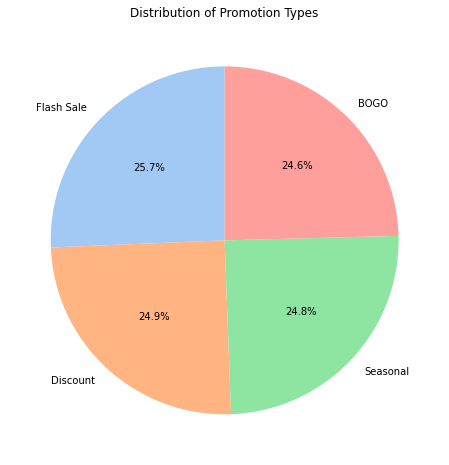

In [12]:
# Count the occurrences of each promotion type
promotion_counts = df_Retail_Sale['promotion'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
promotion_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Promotion Types')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()

### EDA

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# Make a copy to avoid touching original
df_Retail_Sale_Preped = df_Retail_Sale.copy()

# Identify categorical columns
cat_cols = df_Retail_Sale_Preped.select_dtypes(include='object').columns

# Apply Label Encoding
le = LabelEncoder()

for col in cat_cols:
    df_Retail_Sale_Preped[col] = le.fit_transform(df_Retail_Sale_Preped[col].astype(str))

In [15]:
df_Retail_Sale_Preped.head(5)

,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,month,day,year
0,2023-01-01,0,2,3,0,0,1,137.0,1409.76,430.08,979.68,10.29,0.0453,6,1,1,2023
1,2023-01-01,0,1,1,1,0,4,116.0,1612.79,1238.71,374.07,13.90,0.0407,6,1,1,2023
2,2023-01-01,0,3,3,3,0,0,120.0,1307.37,168.46,1138.92,10.89,0.0793,6,1,1,2023
3,2023-01-01,0,4,3,1,0,4,132.0,1756.65,220.98,1535.66,13.31,0.0442,6,1,1,2023
4,2023-01-01,0,0,3,3,0,4,120.0,1764.91,686.24,1078.67,14.71,0.0234,6,1,1,2023


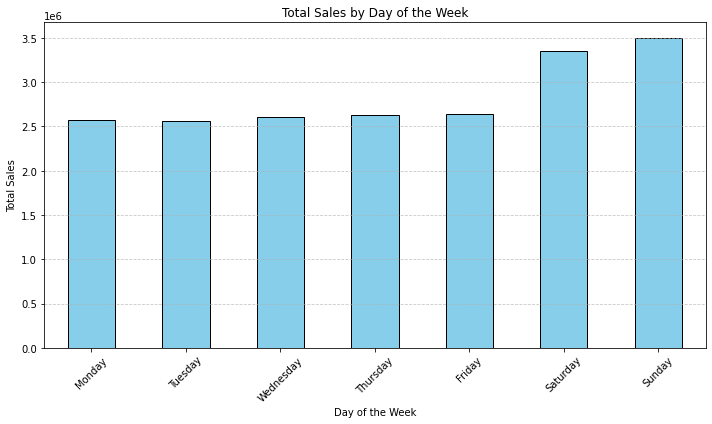

In [17]:
# Extract the weekday name
df_Retail_Sale["weekday"] = df_Retail_Sale["date"].dt.day_name()

# Group sales by weekday
weekday_sales = df_Retail_Sale.groupby("weekday")["total_sales"].sum()

# Reorder to standard week order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.reindex(ordered_days)

# Plotting
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
# Select only continuous features to scale
scale_cols = ['in_store_sales', 'online_sales', 'avg_transaction', 'return_rate', 'num_customers']

scaler = StandardScaler()
df_Retail_Sale_Preped[scale_cols] = scaler.fit_transform(df_Retail_Sale_Preped[scale_cols])


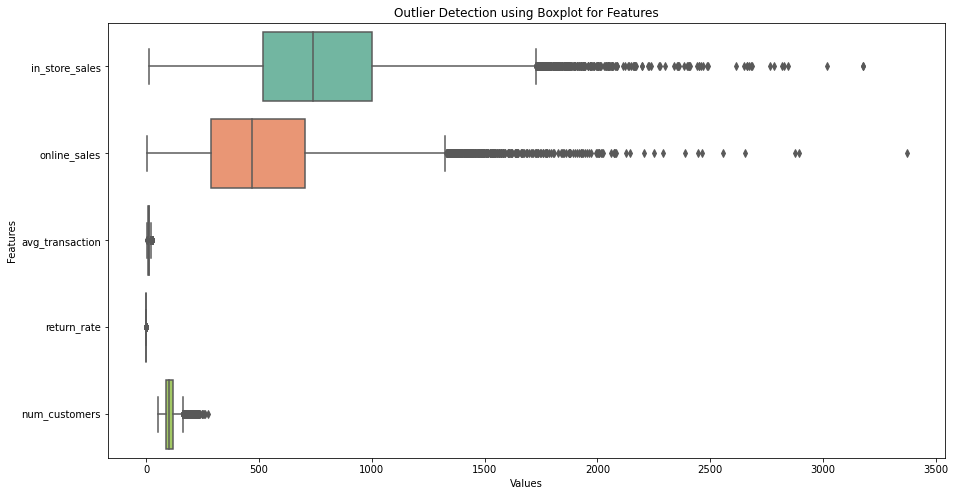

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Retail_Sale[scale_cols], orient='h', palette='Set2')
plt.title('Outlier Detection using Boxplot for Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

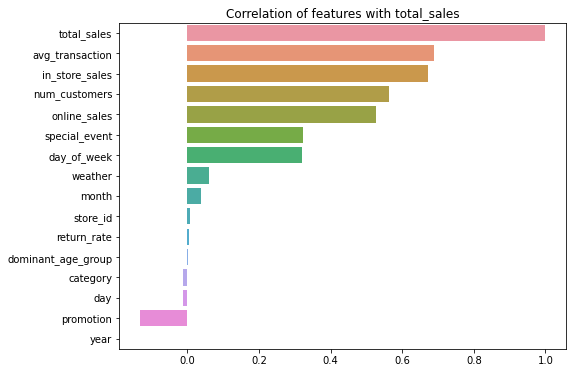

In [20]:
target = 'total_sales'

corr_with_target = df_Retail_Sale_Preped.corr()[target].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title(f"Correlation of features with {target}")
plt.show()

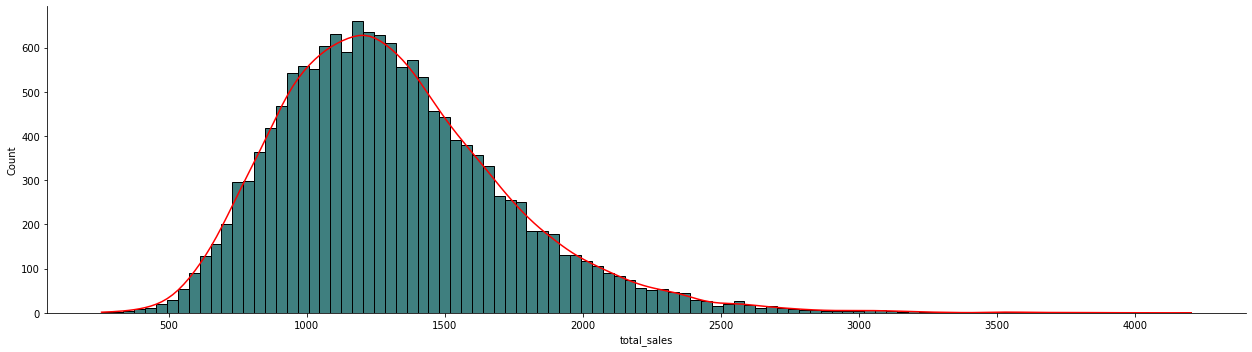

In [21]:
sns.displot(data=df_Retail_Sale_Preped, x="total_sales", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [22]:
# Dropping the 'year' feature as it does not have any form of correlation to the target
df_Retail_Sale = df_Retail_Sale.drop(columns=['year'])
df_Retail_Sale_Preped = df_Retail_Sale_Preped.drop(columns=['year'])

## Sales Forecasting

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                            BaggingRegressor, VotingRegressor, ExtraTreesRegressor)
from sklearn.neural_network import MLPRegressor
import lightgbm as lgbm
import xgboost as xgb
import time

In [24]:
# Select features and target
features = ['store_id', 'category', 'weather', 'promotion', 'special_event',
            'dominant_age_group', 'num_customers', 'online_sales', 'in_store_sales',
            'avg_transaction', 'return_rate', 'day_of_week', 'month', 'day']

target = 'total_sales'

X = df_Retail_Sale_Preped[features]
y = df_Retail_Sale_Preped[target]


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Linear SVR': LinearSVR(max_iter=10000),
    'SVR': SVR(),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgbm.LGBMRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Add VotingRegressor with base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]
models['Voting Regressor'] = VotingRegressor(estimators=base_models)

# Train and evaluate models
results = []
training_times = []
prediction_times = []

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    
    # Training time
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times.append(training_time)
    
    # Prediction time
    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    prediction_time = time.time() - start_time
    prediction_times.append(prediction_time)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV Mean R²': cv_mean,
        'CV Std R²': cv_std,
        'Training Time': training_time,
        'Prediction Time': prediction_time
    })



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1260
[LightGBM] [Info] Number of data points in the train set: 12112, number of used features: 14
[LightGBM] [Info] Start training from score 1310.828511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 12112, number of used features: 14
[LightGBM] [Info] Start training from score 1305.595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] To

In [26]:
# Turn results list into a DataFrame
results_df = pd.DataFrame(results)

# Sort by R² or any other metric you want to prioritize
results_df = results_df.sort_values(by='R²', ascending=False)

# Display
results_df.head(8)

# (Optional) Format numbers for better readability
results_df.style.format({
    'MSE': "{:.4f}",
    'RMSE': "{:.4f}",
    'MAE': "{:.4f}",
    'R²': "{:.4f}",
    'CV Mean R²': "{:.4f}",
    'CV Std R²': "{:.4f}",
    'Training Time': "{:.2f}",
    'Prediction Time': "{:.4f}"
})

,Model,MSE,RMSE,MAE,R²,CV Mean R²,CV Std R²,Training Time,Prediction Time
0,Linear Regression,0.0000,0.0050,0.0026,1.0000,1.0000,0.0000,0.09,0.0055
1,Linear SVR,0.0010,0.0320,0.0249,1.0000,1.0000,0.0000,0.22,0.0000
3,SGD Regressor,0.1024,0.3200,0.1949,1.0000,1.0000,0.0000,0.31,0.0000
11,MLP Regressor,0.2921,0.5405,0.3635,1.0000,1.0000,0.0000,54.53,0.0070
12,Voting Regressor,216.8522,14.7259,7.2437,0.9988,0.9990,0.0003,17.75,0.1501
10,Extra Trees,430.6479,20.7521,5.1963,0.9976,0.9980,0.0010,9.22,0.1818
7,Random Forest,529.5949,23.0129,5.7860,0.9971,0.9976,0.0012,12.23,0.1501
9,LightGBM,584.6328,24.1792,11.8205,0.9968,0.9976,0.0006,0.69,0.0360
8,XGBoost,662.3838,25.7368,15.5482,0.9963,0.9963,0.0010,2.55,0.0202
5,Bagging Regressor,718.0943,26.7973,8.5772,0.9960,0.9968,0.0018,3.74,0.0376


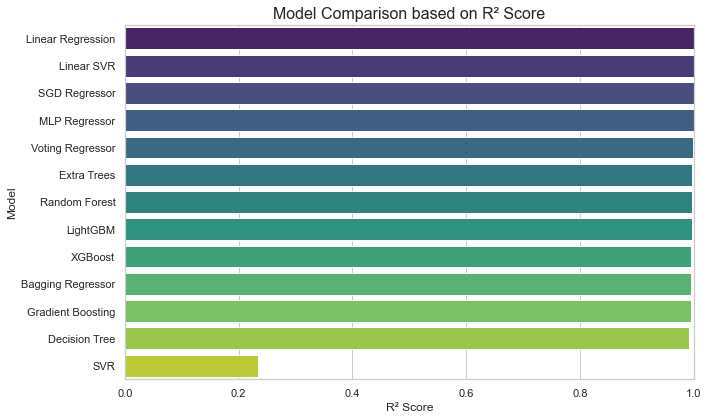

In [27]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot R² Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=results_df, palette='viridis')

plt.title('Model Comparison based on R² Score', fontsize=16)
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # because R² is between 0 and 1
plt.tight_layout()
plt.show()


## Observations
a) Linear Regression and Linear SVR
R² = 1.0000 → suspiciously perfect 

MSE, RMSE, MAE = 0 → too perfect → likely overfitting or data leakage (or you're fitting a very simple/clean dataset).

In a real-world dataset, you rarely get 1.0000 unless there’s some issue.

Don't pick them blindly without checking for data leakage first.

b) Voting Regressor
R² = 0.9987, very high, CV Mean R² also 0.9990, low CV Std 0.0003 — VERY GOOD, very stable.

Training time: 14.71s → Reasonable.

c) Extra Trees
R² = 0.9977, very good.

Slightly worse than Voting Regressor.

d) Random Forest
R² = 0.9971 → good but not as high.

Training time: 18.56s (heavier).

e) LightGBM
R² = 0.9968, a little lower.

Training Time = 0.76s (very fast!).

f) XGBoost
R² = 0.9961, slower than LightGBM, and slightly worse R².

g) Decision Tree
R² = 0.9928, weaker compared to the others.

-----
Conclusion : 
Highest realistic R² (without being suspiciously perfect like Linear Regression).
Very low cross-validation variation.
Good generalization (CV Mean R² matches Test R²).

In [28]:
# Pick model with highest CV Mean R²
best_model_name = models['Voting Regressor']
print(f"Best model is: {best_model_name}")
# Refit the Voting Regressor on ALL data
voting_pipeline = Pipeline([
    ('model', best_model_name)
])


Best model is: VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor())])


### Predicting 14 days of January 2021

In [29]:
# Prepare future dates
future_dates = pd.date_range(start='2024-01-01', periods=14)

# Create combinations of store_id and category
store_categories = df_Retail_Sale_Preped[['store_id', 'category']].drop_duplicates()

# Build future dataframe
future_df = pd.DataFrame()

for date in future_dates:
    temp = store_categories.copy()
    temp['date'] = date
    future_df = pd.concat([future_df, temp], ignore_index=True)

# Feature engineering
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day

# Fill other columns with reasonable default values
future_df['weather'] = np.random.choice(df_Retail_Sale_Preped['weather'].dropna().values, size=len(future_df))
future_df['promotion'] = np.random.choice(df_Retail_Sale_Preped['promotion'].dropna().values, size=len(future_df))
future_df['special_event'] = np.random.choice(df_Retail_Sale_Preped['special_event'].dropna().values, size=len(future_df))
future_df['dominant_age_group'] = np.random.choice(df_Retail_Sale['dominant_age_group'].dropna().values, size=len(future_df))

# Numeric features: fill with median values
future_df['num_customers'] = df_Retail_Sale['num_customers'].median()
future_df['online_sales'] = df_Retail_Sale['online_sales'].median()
future_df['in_store_sales'] = df_Retail_Sale['in_store_sales'].median()
future_df['avg_transaction'] = df_Retail_Sale['avg_transaction'].median()
future_df['return_rate'] = df_Retail_Sale['return_rate'].median()


In [30]:
future_df.head(10)

,store_id,category,date,day_of_week,month,day,weather,promotion,special_event,dominant_age_group,num_customers,online_sales,in_store_sales,avg_transaction,return_rate
0,0,2,2024-01-01,0,1,1,1,0,0,25-34,102.0,468.4,738.44,12.22,0.0499
1,0,1,2024-01-01,0,1,1,3,1,0,55+,102.0,468.4,738.44,12.22,0.0499
2,0,3,2024-01-01,0,1,1,4,2,0,25-34,102.0,468.4,738.44,12.22,0.0499
3,0,4,2024-01-01,0,1,1,4,3,0,35-44,102.0,468.4,738.44,12.22,0.0499
4,0,0,2024-01-01,0,1,1,4,0,0,18-24,102.0,468.4,738.44,12.22,0.0499
5,2,2,2024-01-01,0,1,1,3,2,0,55+,102.0,468.4,738.44,12.22,0.0499
6,2,1,2024-01-01,0,1,1,0,1,0,18-24,102.0,468.4,738.44,12.22,0.0499
7,2,3,2024-01-01,0,1,1,3,2,0,18-24,102.0,468.4,738.44,12.22,0.0499
8,2,4,2024-01-01,0,1,1,1,1,0,18-24,102.0,468.4,738.44,12.22,0.0499
9,3,2,2024-01-01,0,1,1,0,0,0,55+,102.0,468.4,738.44,12.22,0.0499


In [31]:
future_df.columns

Index(['store_id', 'category', 'date', 'day_of_week', 'month', 'day',
       'weather', 'promotion', 'special_event', 'dominant_age_group',
       'num_customers', 'online_sales', 'in_store_sales', 'avg_transaction',
       'return_rate'],
      dtype='object')

In [32]:
cat_cols = future_df.select_dtypes(include='object').columns
print(cat_cols.values)
# Apply Label Encoding
le = LabelEncoder()

for col in cat_cols:
    future_df[col] = le.fit_transform(future_df[col].astype(str))



['dominant_age_group']


In [33]:
features = ['store_id', 'category', 'weather', 'promotion', 'special_event',
            'dominant_age_group', 'num_customers', 'online_sales', 'in_store_sales',
            'avg_transaction', 'return_rate', 'day_of_week', 'month', 'day']
# Select only the features, no target
X_future = future_df[features]  # <- same features as during training

target = 'total_sales'

# Predict future sales
future_predictions = voting_pipeline.predict(X_future)

# Add the predictions to your future dataframe
future_df['predicted_total_sales'] = future_predictions

In [34]:
future_df.head(10)

,store_id,category,date,day_of_week,month,day,weather,promotion,special_event,dominant_age_group,num_customers,online_sales,in_store_sales,avg_transaction,return_rate,predicted_total_sales
0,0,2,2024-01-01,0,1,1,1,0,0,1,102.0,468.4,738.44,12.22,0.0499,144919.755957
1,0,1,2024-01-01,0,1,1,3,1,0,4,102.0,468.4,738.44,12.22,0.0499,144917.102489
2,0,3,2024-01-01,0,1,1,4,2,0,1,102.0,468.4,738.44,12.22,0.0499,144941.026984
3,0,4,2024-01-01,0,1,1,4,3,0,2,102.0,468.4,738.44,12.22,0.0499,144956.645264
4,0,0,2024-01-01,0,1,1,4,0,0,0,102.0,468.4,738.44,12.22,0.0499,144912.683169
5,2,2,2024-01-01,0,1,1,3,2,0,4,102.0,468.4,738.44,12.22,0.0499,144924.474023
6,2,1,2024-01-01,0,1,1,0,1,0,0,102.0,468.4,738.44,12.22,0.0499,144914.259070
7,2,3,2024-01-01,0,1,1,3,2,0,0,102.0,468.4,738.44,12.22,0.0499,144946.963106
8,2,4,2024-01-01,0,1,1,1,1,0,0,102.0,468.4,738.44,12.22,0.0499,144958.183215
9,3,2,2024-01-01,0,1,1,0,0,0,4,102.0,468.4,738.44,12.22,0.0499,144919.685850


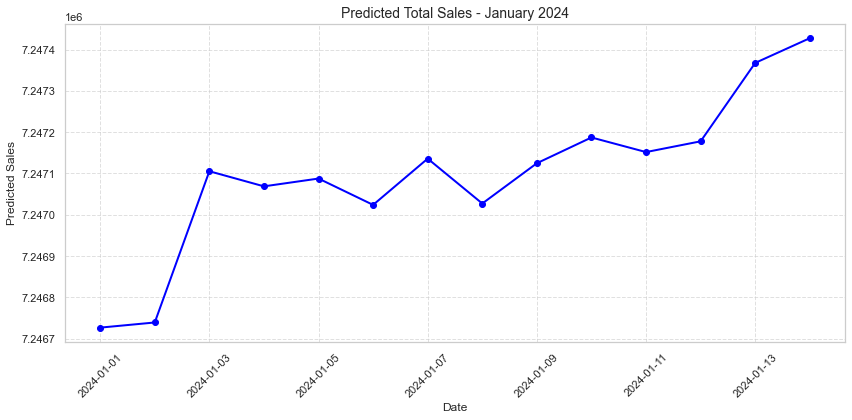

In [35]:
# Assuming future_df contains your predictions with 'date' and 'predicted_total_sales' columns
daily_sales = future_df.groupby('date')['predicted_total_sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], 
         daily_sales['predicted_total_sales'], 
         marker='o', 
         linestyle='-', 
         color='blue', 
         linewidth=2)

# Add titles and labels
plt.title('Predicted Total Sales - January 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)

# Format x-axis dates
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

<AxesSubplot:>

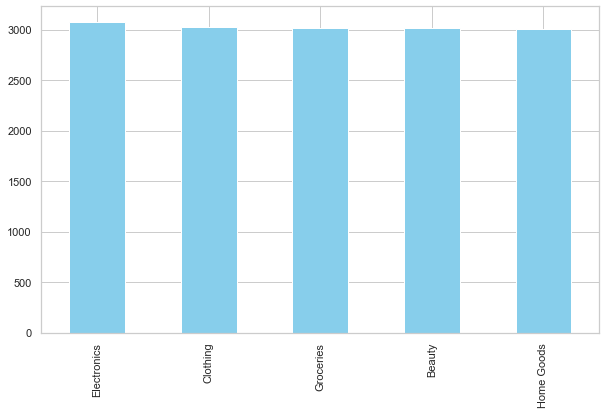

In [36]:
df_Retail_Sale['category'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue') 

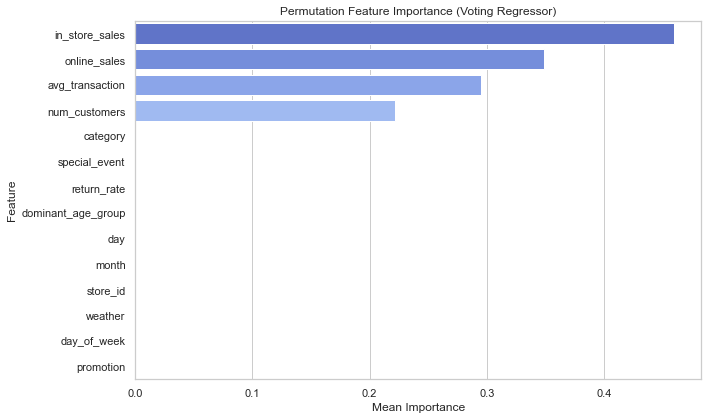

In [37]:
#Feature Importance 
from sklearn.inspection import permutation_importance

# Assuming your trained model is called `voting_regressor`
result = permutation_importance(best_model_name, X, y, n_repeats=10, random_state=42, scoring='r2')

# Format into DataFrame
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='importance_mean', y='feature', palette="coolwarm")
plt.title('Permutation Feature Importance (Voting Regressor)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Customer Segmentation

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


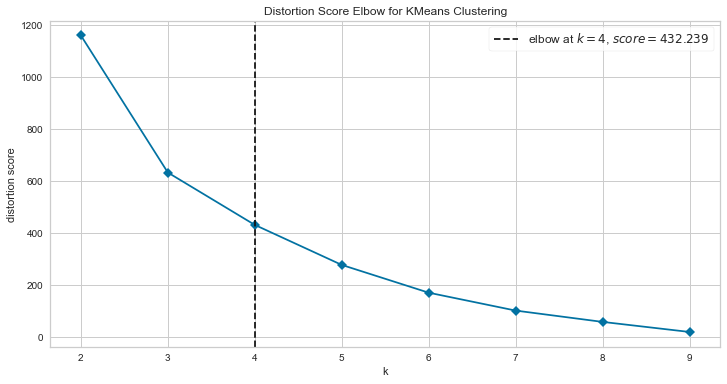

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Focusing on features that characterize customer behavior
segmentation_features = [
    'num_customers',        # Store traffic
    'total_sales',          # Overall performance
    'online_sales',         # Digital channel engagement
    'in_store_sales',       # Physical store engagement
    'avg_transaction',      # Spending behavior
    'return_rate',          # Product satisfaction
    'day_of_week',          # Weekly patterns
    'month'                 # Seasonal trends
]

#Data Aggregation at Store Level
store_level_data = df_Retail_Sale_Preped.groupby('store_id').agg({
    'num_customers': 'mean',
    'total_sales': 'mean',
    'online_sales': 'mean',
    'in_store_sales': 'mean',
    'avg_transaction': 'mean',
    'return_rate': 'mean',
    'day_of_week': lambda x: x.mode()[0],  # Most common day
    'month': lambda x: x.mode()[0]         # Most common month
})

store_level_data['online_ratio'] = store_level_data['online_sales'] / store_level_data['total_sales']
store_level_data['weekend_ratio'] = df_Retail_Sale_Preped[df_Retail_Sale_Preped['day_of_week'].isin([5,6])].groupby('store_id')['total_sales'].sum() / store_level_data['total_sales']
store_level_data.fillna(0, inplace=True)


plt.figure(figsize=(12, 6))
visualizer = KElbowVisualizer(
    KMeans(random_state=42),
    k=(2,10),
    metric='distortion',
    timings=False
)
visualizer.fit(store_level_data)
visualizer.show()




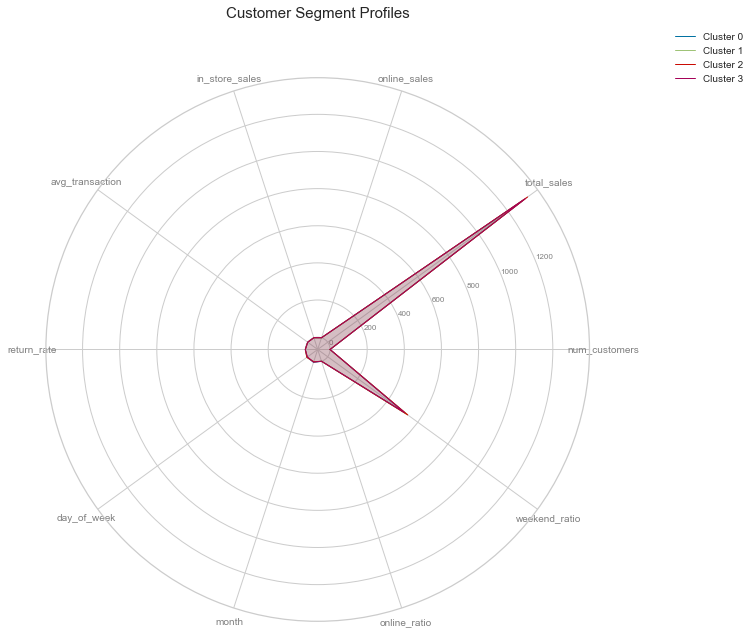


Cluster Characteristics:

Cluster 0 (n=4):
- Avg Customers: -0
- Online Sales Ratio: -0.00%
- Weekend Sales Ratio: 51707.81%
- Avg Transaction: $-0.02
- Return Rate: 0.95%

Cluster 1 (n=2):
- Avg Customers: -0
- Online Sales Ratio: 0.00%
- Weekend Sales Ratio: 53154.83%
- Avg Transaction: $-0.02
- Return Rate: -4.60%

Cluster 2 (n=2):
- Avg Customers: 0
- Online Sales Ratio: 0.00%
- Weekend Sales Ratio: 53290.39%
- Avg Transaction: $0.03
- Return Rate: -1.23%

Cluster 3 (n=2):
- Avg Customers: -0
- Online Sales Ratio: 0.00%
- Weekend Sales Ratio: 50990.58%
- Avg Transaction: $0.02
- Return Rate: 3.87%


In [41]:
#Perform Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(store_level_data)
store_level_data['cluster'] = clusters

cluster_profiles = store_level_data.groupby('cluster').mean()

# Radar plot for cluster profiles
categories = cluster_profiles.columns
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for i in range(len(cluster_profiles)):
    values = cluster_profiles.iloc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', 
            label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, color='grey', size=10)
plt.yticks(color="grey", size=8)
plt.title('Customer Segment Profiles', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

print("\nCluster Characteristics:")
for cluster in sorted(store_level_data['cluster'].unique()):
    print(f"\nCluster {cluster} (n={sum(store_level_data['cluster']==cluster)}):")
    cluster_data = store_level_data[store_level_data['cluster']==cluster].mean()
    print(f"- Avg Customers: {cluster_data['num_customers']:.0f}")
    print(f"- Online Sales Ratio: {cluster_data['online_ratio']:.2%}")
    print(f"- Weekend Sales Ratio: {cluster_data['weekend_ratio']:.2%}")
    print(f"- Avg Transaction: ${cluster_data['avg_transaction']:.2f}")
    print(f"- Return Rate: {cluster_data['return_rate']:.2%}")